# PREPROCESSING

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_parquet('data_youtube.parquet') #parquet so i can carry it around
data.shape

(664450, 28)

In [4]:
data.video_trending_country.value_counts()

video_trending_country
Papua New Guinea    9000
Venezuela           9000
Bolivia             9000
Chile               9000
Colombia            9000
                    ... 
Ukraine             3169
Zimbabwe            2985
Belarus             2802
Bangladesh          2645
Uganda              2421
Name: count, Length: 110, dtype: int64

In [5]:
data.isnull().sum()

video_id                                0
video_published_at                      0
video_trending__date                    0
video_trending_country                  0
channel_id                              0
video_title                             0
video_description                  105995
video_default_thumbnail                 0
video_category_id                     568
video_tags                         214609
video_duration                          0
video_dimension                         0
video_definition                        0
video_licensed_content                  0
video_view_count                       31
video_like_count                     8567
video_comment_count                  5723
channel_title                           0
channel_description                 50673
channel_custom_url                   2206
channel_published_at                    0
channel_country                    110350
channel_view_count                      0
channel_subscriber_count          

In [6]:
data = data.drop_duplicates()
data['video_published_at'] = pd.to_datetime(data['video_published_at'], errors='coerce', format='mixed')
data['video_trending__date'] = pd.to_datetime(data['video_trending__date'], errors='coerce',format='mixed')
data['channel_published_at'] = pd.to_datetime(data['channel_published_at'], errors='coerce',format='mixed')
data.isnull().sum()

video_id                                0
video_published_at                      0
video_trending__date                    0
video_trending_country                  0
channel_id                              0
video_title                             0
video_description                  105994
video_default_thumbnail                 0
video_category_id                     568
video_tags                         214608
video_duration                          0
video_dimension                         0
video_definition                        0
video_licensed_content                  0
video_view_count                       31
video_like_count                     8567
video_comment_count                  5723
channel_title                           0
channel_description                 50673
channel_custom_url                   2206
channel_published_at                    0
channel_country                    110350
channel_view_count                      0
channel_subscriber_count          

In [8]:
numeric_columns = ['video_view_count', 'video_like_count', 'video_comment_count',
                   'channel_view_count', 'channel_subscriber_count', 'channel_video_count']

invalid_values = {}
for col in numeric_columns:
    invalid_values[col] = {
        "negative_values": (data[col] < 0).sum(),
        "zero_values": (data[col] == 0).sum()
    }
    
    
print(invalid_values)

{'video_view_count': {'negative_values': 0, 'zero_values': 0}, 'video_like_count': {'negative_values': 0, 'zero_values': 0}, 'video_comment_count': {'negative_values': 0, 'zero_values': 1854}, 'channel_view_count': {'negative_values': 0, 'zero_values': 41}, 'channel_subscriber_count': {'negative_values': 0, 'zero_values': 0}, 'channel_video_count': {'negative_values': 0, 'zero_values': 15}}


In [11]:
zero_channel_views = data[data['channel_view_count'] == 0]
zero_channel_videos = data[data['channel_video_count'] == 0]

zero_channel_views_info = zero_channel_views[['channel_title', 'channel_view_count', 'channel_video_count', 'channel_subscriber_count']]
zero_channel_videos_info = zero_channel_videos[['channel_title', 'channel_view_count', 'channel_video_count', 'channel_subscriber_count']]

zero_channel_views_info

,channel_title,channel_view_count,channel_video_count,channel_subscriber_count
168831,JennieRubyJaneVEVO,0,0,1
169189,JennieRubyJaneVEVO,0,0,1
169487,JennieRubyJaneVEVO,0,0,1
169847,JennieRubyJaneVEVO,0,0,1
170061,JennieRubyJaneVEVO,0,0,1
171333,JennieRubyJaneVEVO,0,0,1
175882,JennieRubyJaneVEVO,0,0,1
176717,JennieRubyJaneVEVO,0,0,1
180759,JennieRubyJaneVEVO,0,0,1
186502,AlexPonceVEVO,0,1,43


In [12]:
data_cleaned = data[~((data['channel_view_count'] == 0) & (data['channel_video_count'] == 0))]
rows_removed = len(data) - len(data_cleaned)
remaining_rows = len(data_cleaned)
data_cleaned['video_description'].fillna("No description available", inplace=True)
data_cleaned['channel_description'].fillna("No description available", inplace=True)
data_cleaned['video_tags'].fillna("None", inplace=True)
data_cleaned['channel_country'].fillna("Unknown", inplace=True)
data_cleaned = data_cleaned.dropna(subset=['video_category_id'])
remaining_rows_after_cleaning = len(data_cleaned)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_36652\3503625893.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['video_description'].fillna("No description available", inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_36652\3503625893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['video_

In [13]:
print(rows_removed)
print(remaining_rows)
print(remaining_rows_after_cleaning)
print(data_cleaned.isna().sum())

9
664440
663872
video_id                               0
video_published_at                     0
video_trending__date                   0
video_trending_country                 0
channel_id                             0
video_title                            0
video_description                      0
video_default_thumbnail                0
video_category_id                      0
video_tags                             0
video_duration                         0
video_dimension                        0
video_definition                       0
video_licensed_content                 0
video_view_count                      31
video_like_count                    8560
video_comment_count                 5714
channel_title                          0
channel_description                    0
channel_custom_url                  2206
channel_published_at                   0
channel_country                        0
channel_view_count                     0
channel_subscriber_count               0


In [14]:
data_cleaned['channel_custom_url'].fillna("Unknown", inplace=True)
data_cleaned['channel_localized_description'].fillna("No localized description available", inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_36652\2811296095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['channel_custom_url'].fillna("Unknown", inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_36652\2811296095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [16]:
data_cleaned.isnull().sum()

video_id                              0
video_published_at                    0
video_trending__date                  0
video_trending_country                0
channel_id                            0
video_title                           0
video_description                     0
video_default_thumbnail               0
video_category_id                     0
video_tags                            0
video_duration                        0
video_dimension                       0
video_definition                      0
video_licensed_content                0
video_view_count                     31
video_like_count                   8560
video_comment_count                5714
channel_title                         0
channel_description                   0
channel_custom_url                    0
channel_published_at                  0
channel_country                       0
channel_view_count                    0
channel_subscriber_count              0
channel_have_hidden_subscribers       0


In [22]:
# check the row null of video_view_count                     
data_cleaned[data_cleaned['video_view_count'].isnull()]['video_view_count']

# all the rows with NaN values for video_view_count, video_like_count, video_comment_count replaced with 0
data_cleaned['video_view_count'].fillna(0, inplace=True)
data_cleaned['video_like_count'].fillna(0, inplace=True)
data_cleaned['video_comment_count'].fillna(0, inplace=True)                                 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_36652\1735428938.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['video_view_count'].fillna(0, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_36652\1735428938.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [29]:
# drop rows with zero video_view_count
data_cleaned = data_cleaned[data_cleaned['video_view_count'] != 0]
data_cleaned.isnull().sum()

video_id                           0
video_published_at                 0
video_trending__date               0
video_trending_country             0
channel_id                         0
video_title                        0
video_description                  0
video_default_thumbnail            0
video_category_id                  0
video_tags                         0
video_duration                     0
video_dimension                    0
video_definition                   0
video_licensed_content             0
video_view_count                   0
video_like_count                   0
video_comment_count                0
channel_title                      0
channel_description                0
channel_custom_url                 0
channel_published_at               0
channel_country                    0
channel_view_count                 0
channel_subscriber_count           0
channel_have_hidden_subscribers    0
channel_video_count                0
channel_localized_title            0
c

In [30]:
data_cleaned['engagement_rate'] = (
    (data_cleaned['video_like_count'] + data_cleaned['video_comment_count']) /
    data_cleaned['video_view_count']
)
data_cleaned['engagement_rate'].head()

0    0.106899
1    0.000643
2    0.130919
3    0.000829
4    0.040684
Name: engagement_rate, dtype: float64

In [31]:
data_cleaned['engagement_rate'].describe()  

count    663841.000000
mean          0.040195
std           0.028998
min           0.000000
25%           0.019305
50%           0.033515
75%           0.053573
max           0.403776
Name: engagement_rate, dtype: float64

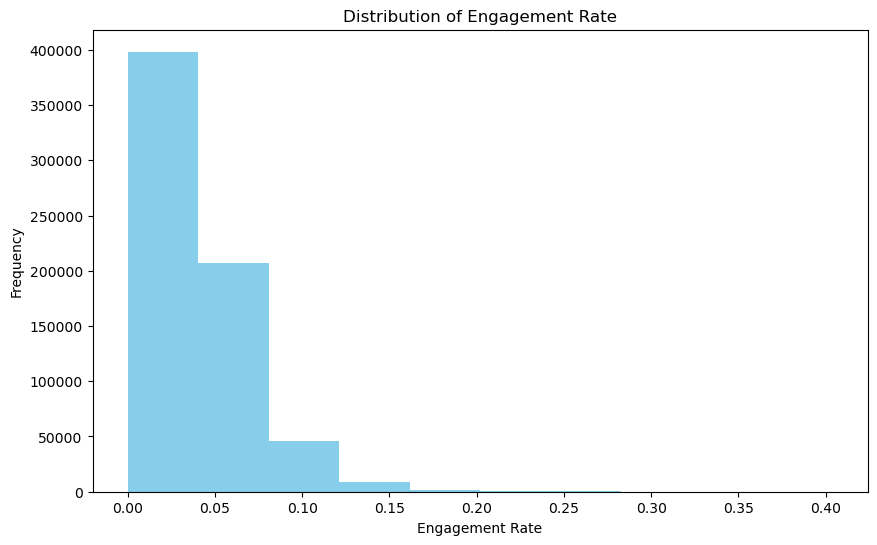

In [32]:
# plot engagement rate
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['engagement_rate'], color='skyblue')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

In [36]:
data_cleaned[['video_published_at', 'video_trending__date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 663841 entries, 0 to 664449
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   video_published_at    663841 non-null  datetime64[ns, UTC]
 1   video_trending__date  663841 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1)
memory usage: 15.2 MB


In [39]:
data_cleaned['time_difference']  = data_cleaned['video_trending__date'] - data_cleaned['video_published_at'].dt.tz_localize(None)
data_cleaned[['video_trending__date', 'video_published_at', 'time_difference']]

,video_trending__date,video_published_at,time_difference
0,2024-10-12,2024-10-11 00:00:06+00:00,0 days 23:59:54
1,2024-10-12,2024-10-11 02:59:21+00:00,0 days 21:00:39
2,2024-10-12,2024-10-11 11:07:25+00:00,0 days 12:52:35
3,2024-10-12,2024-10-11 00:10:10+00:00,0 days 23:49:50
4,2024-10-12,2024-10-09 12:30:27+00:00,2 days 11:29:33
...,...,...,...
664445,2024-11-26,2024-11-20 00:30:35+00:00,5 days 23:29:25
664446,2024-11-26,2024-11-20 13:01:11+00:00,5 days 10:58:49
664447,2024-11-26,2024-11-19 17:00:02+00:00,6 days 06:59:58
664448,2024-11-26,2024-11-19 19:32:45+00:00,6 days 04:27:15


In [40]:
import pandas as pd
import isodate

data_cleaned['video_duration_seconds'] = data_cleaned['video_duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())
data_cleaned['video_duration_seconds'].head()

0     148.0
1     608.0
2    2604.0
3     609.0
4     132.0
Name: video_duration_seconds, dtype: float64

In [41]:
data_cleaned[['engagement_rate', 'time_difference', 'video_duration_seconds']].head()

,engagement_rate,time_difference,video_duration_seconds
0,0.106899,0 days 23:59:54,148.0
1,0.000643,0 days 21:00:39,608.0
2,0.130919,0 days 12:52:35,2604.0
3,0.000829,0 days 23:49:50,609.0
4,0.040684,2 days 11:29:33,132.0


# EDA

In [42]:
data_saved = data_cleaned.copy()

In [44]:
feature_stats = data_cleaned[['engagement_rate', 'time_difference', 'video_duration_seconds']].describe()

data_cleaned['time_difference_days'] = pd.to_timedelta(data_cleaned['time_difference']).dt.total_seconds() / (3600 * 24)
time_difference_stats = data_cleaned['time_difference_days'].describe()
feature_summary = pd.DataFrame({
    "Engagement Rate": feature_stats['engagement_rate'],
    "Video Duration (seconds)": feature_stats['video_duration_seconds'],
    "Time to Trend (days)": time_difference_stats
})
feature_summary 

,Engagement Rate,Video Duration (seconds),Time to Trend (days)
count,663841.000000,663841.000000,663841.000000
mean,0.040195,1059.444957,11.847337
std,0.028998,2471.208326,8.628643
min,0.000000,10.000000,-0.732535
25%,0.019305,46.000000,4.791620
50%,0.033515,225.000000,9.958206
75%,0.053573,1188.000000,17.541366
max,0.403776,50264.000000,37.083322


In [50]:
post_data_drop_id = data_cleaned.drop_duplicates(subset=['video_id'])
print(post_data_drop_id.shape)
post_data_drop_id.head()

(23933, 32)


,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description,engagement_rate,time_difference,video_duration_seconds,time_difference_days
0,bB3-CUMERIU,2024-10-11 00:00:06+00:00,2024-10-12,United Arab Emirates,UCNYi_zGmR519r5gYdOKLTjQ,JENNIE - Mantra (Official Music Video),Official music video for “Mantra” by JENNIE ou...,https://i.ytimg.com/vi/bB3-CUMERIU/default.jpg,Music,"JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...",...,464615150,11600000,False,43,JENNIE,No localized description available,0.106899,0 days 23:59:54,148.0,0.999931
1,5ObJt_71AYc,2024-10-11 02:59:21+00:00,2024-10-12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,CHILE vs. BRASIL [1-2] | RESUMEN | ELIMINATORI...,#Chile #Brasil #eliminatoriassudamericanas #Cr...,https://i.ytimg.com/vi/5ObJt_71AYc/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,399046746,1610000,False,4637,CONMEBOL,Canal Oficial de la Confederación Sudamericana...,0.000643,0 days 21:00:39,608.0,0.875451
2,zfb0whgBBA8,2024-10-11 11:07:25+00:00,2024-10-12,United Arab Emirates,UCgGYPnVJytkr6sVNLQ-l0zQ,تحدي الحقيبة مع ابو عبير 🔥 | سلسلتنا #2,"1,375,547 مشترك❤️\n\nـــــــــــــــــــــــــ...",https://i.ytimg.com/vi/zfb0whgBBA8/default.jpg,Gaming,"تشكيله,فيفا,فيفا20,التمت,درافت,زلاتان,ام,جي,مل...",...,114331110,1380000,False,314,LLE عبدالاله,صانع محتوى وانزل مقاطع بشكل غير منظم 🌚,0.130919,0 days 12:52:35,2604.0,0.536516
3,SJfoPdeOPCQ,2024-10-11 00:10:10+00:00,2024-10-12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,VENEZUELA vs. ARGENTINA [1-1] | RESUMEN | ELIM...,#Venezuela #Argentina #eliminatoriassudamerica...,https://i.ytimg.com/vi/SJfoPdeOPCQ/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,399046746,1610000,False,4637,CONMEBOL,Canal Oficial de la Confederación Sudamericana...,0.000829,0 days 23:49:50,609.0,0.992940
4,UVb6QOKy0bI,2024-10-09 12:30:27+00:00,2024-10-12,United Arab Emirates,UCOzubmwpVZI7gD0Jf7Bk3Aw,Bougainvillea Trailer | October 17 | Jyothirma...,Presenting The Official Trailer of Bougainvill...,https://i.ytimg.com/vi/UVb6QOKy0bI/default.jpg,Film & Animation,None,...,19991522,40600,False,56,Amal Neerad Productions,Official YouTube Channel Of Amal Neerad Produc...,0.040684,2 days 11:29:33,132.0,2.478854


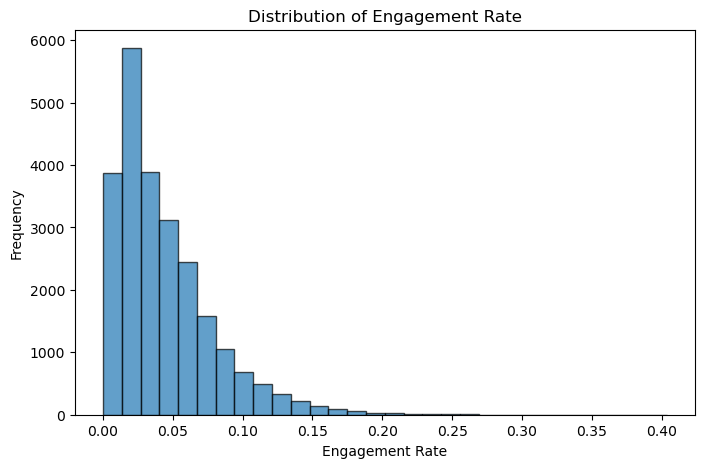

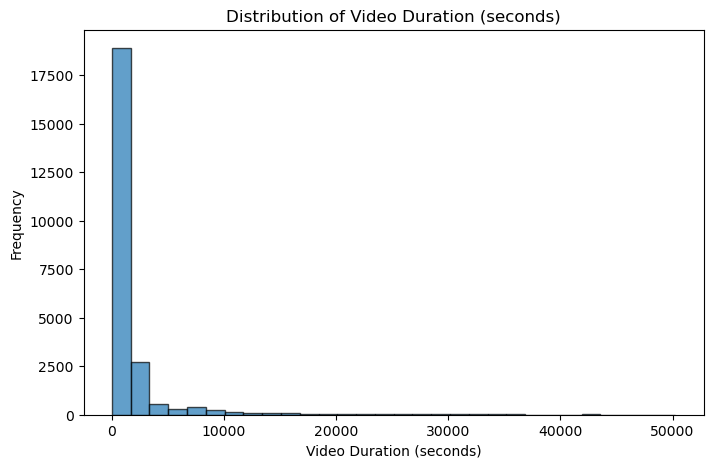

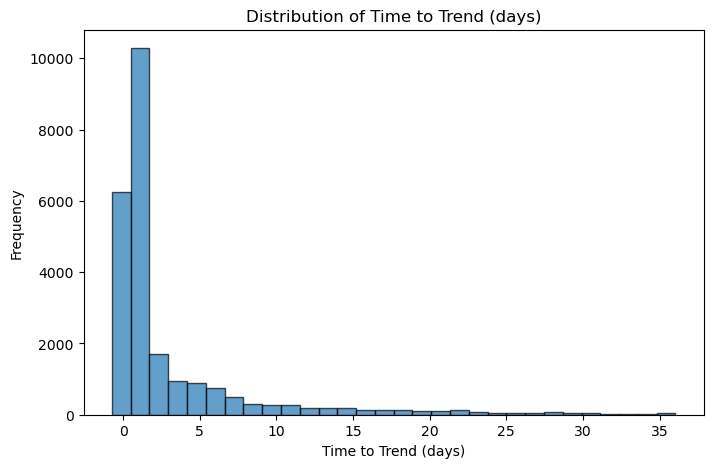

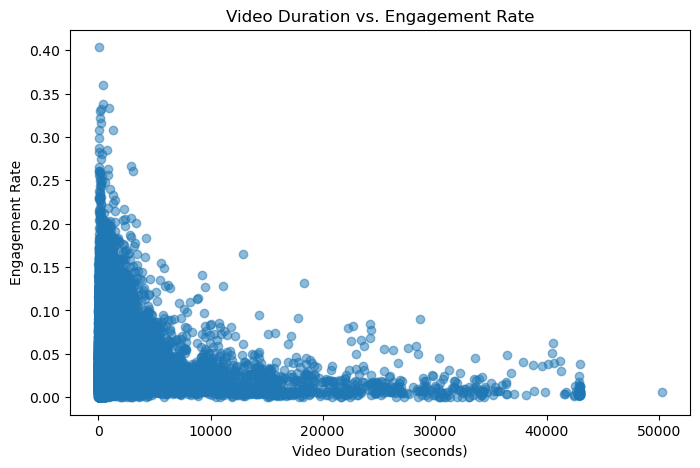

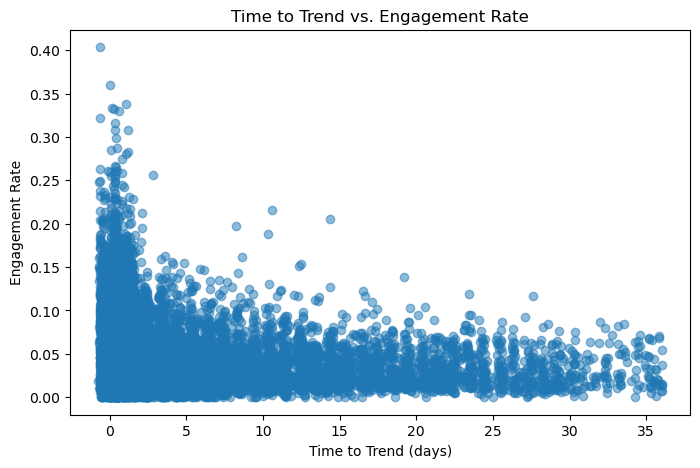

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['engagement_rate'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['video_duration_seconds'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Video Duration (seconds)')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show() # viewer attention spans tend to be short, and platforms like youtube priortize shorter (youtube shorts, memes)

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['time_difference_days'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Time to Trend (days)')
plt.xlabel('Time to Trend (days)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['video_duration_seconds'], post_data_drop_id['engagement_rate'], alpha=0.5)
plt.title('Video Duration vs. Engagement Rate')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Engagement Rate')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['time_difference_days'], post_data_drop_id['engagement_rate'], alpha=0.5)
plt.title('Time to Trend vs. Engagement Rate')
plt.xlabel('Time to Trend (days)')
plt.ylabel('Engagement Rate')
plt.show()

In [53]:
category_analysis_debug = post_data_drop_id.groupby('video_category_id').agg({
    'engagement_rate': 'mean',
    'video_duration_seconds': 'mean',
    'time_difference_days': 'mean'
}).rename(columns={'time_difference_days': 'avg_time_to_trend_days'})
category_analysis_debug

,engagement_rate,video_duration_seconds,avg_time_to_trend_days
video_category_id,,,
Autos & Vehicles,0.054108,1732.063452,2.288108
Comedy,0.051551,928.794118,4.136390
Education,0.053245,1246.225519,2.751729
Entertainment,0.041356,1470.964032,3.105523
Film & Animation,0.044280,1633.011598,3.439242
Gaming,0.060420,3155.759296,2.243700
Howto & Style,0.037866,612.860687,4.225396
Music,0.063368,441.703250,4.348499
News & Politics,0.024000,3720.703961,1.940264


In [54]:
country_analysis_debug = post_data_drop_id.groupby('video_trending_country').agg({
    'engagement_rate': 'mean',
    'video_duration_seconds': 'mean',
    'time_difference_days': 'mean'
}).rename(columns={'time_difference_days': 'avg_time_to_trend_days'})
country_analysis_debug

,engagement_rate,video_duration_seconds,avg_time_to_trend_days
video_trending_country,,,
Algeria,0.051306,990.532051,3.308746
Argentina,0.059579,1081.545455,4.227021
Australia,0.053914,1128.331187,1.074901
Austria,0.056740,1147.959108,2.308696
Azerbaijan,0.026506,2908.115385,7.127547
...,...,...,...
United States,0.043794,522.931818,1.363813
Uruguay,0.021784,1070.500000,6.506177
Venezuela,0.101192,205.000000,2.987083


In [55]:
top_categories_engagement = category_analysis_debug.sort_values('engagement_rate', ascending=False).head(10)
top_categories_trend = category_analysis_debug.sort_values('avg_time_to_trend_days', ascending=True).head(10)

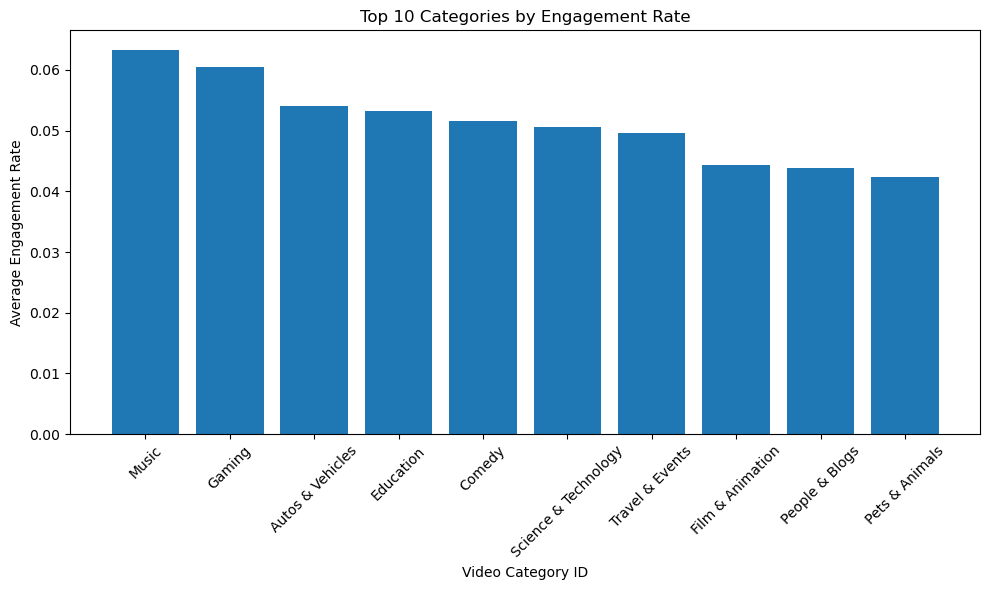

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(top_categories_engagement.index, top_categories_engagement['engagement_rate'])
plt.title('Top 10 Categories by Engagement Rate')
plt.xlabel('Video Category ID')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

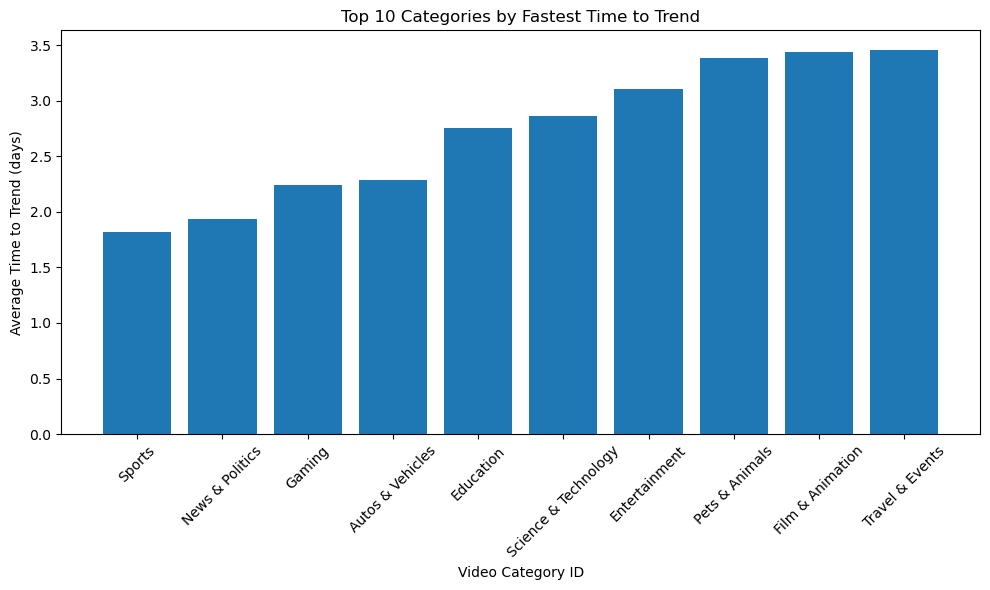

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(top_categories_trend.index, top_categories_trend['avg_time_to_trend_days'])
plt.title('Top 10 Categories by Fastest Time to Trend')
plt.xlabel('Video Category ID')
plt.ylabel('Average Time to Trend (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

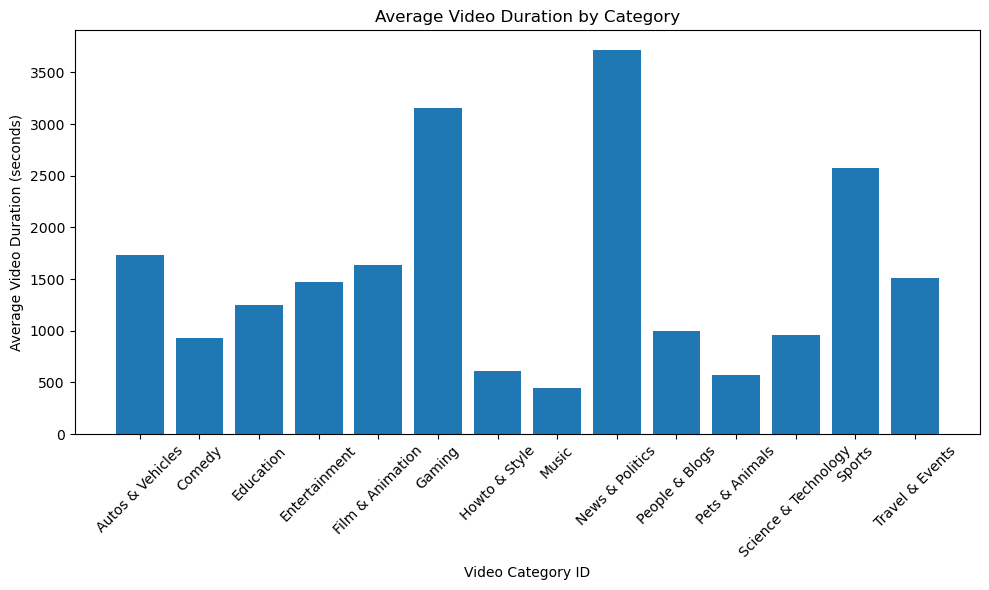

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(category_analysis_debug.index, category_analysis_debug['video_duration_seconds'])
plt.title('Average Video Duration by Category')
plt.xlabel('Video Category ID')
plt.ylabel('Average Video Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

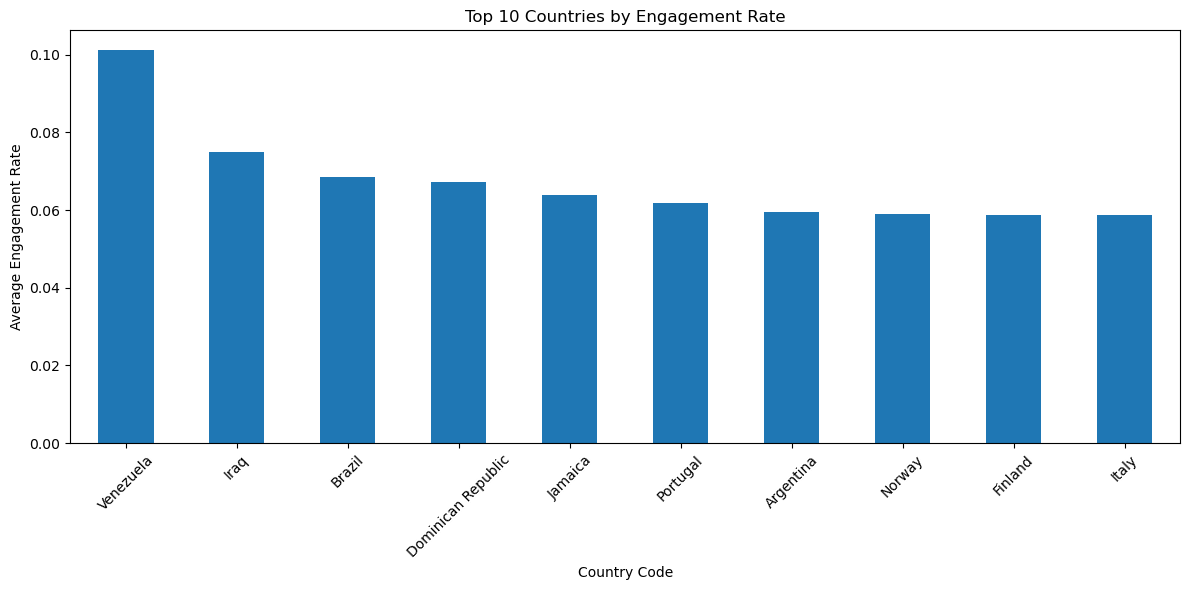

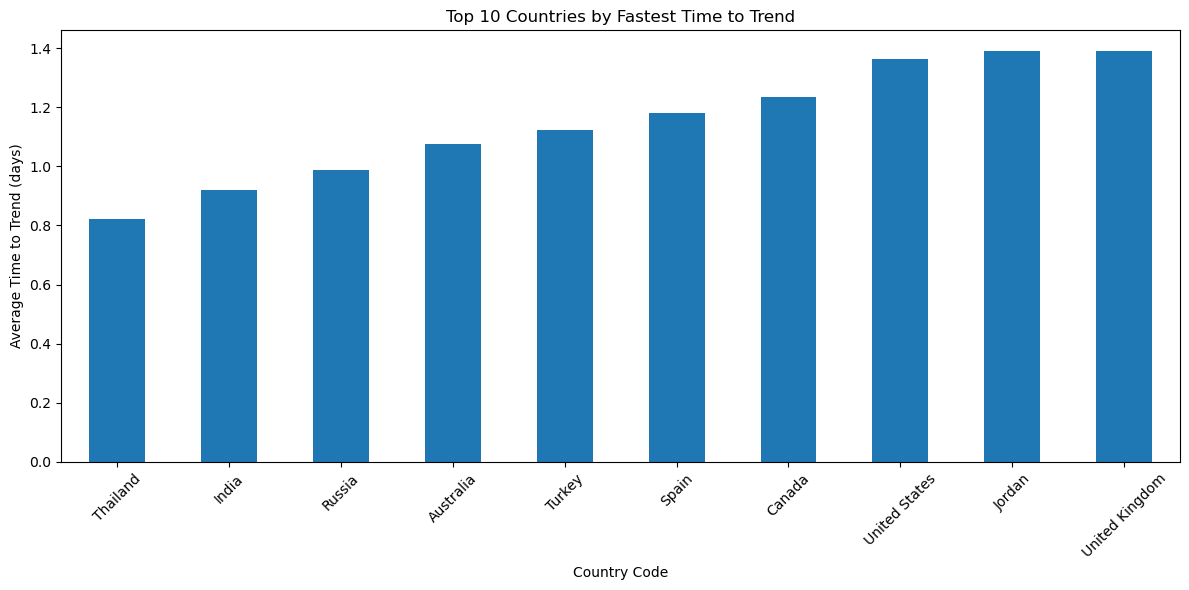

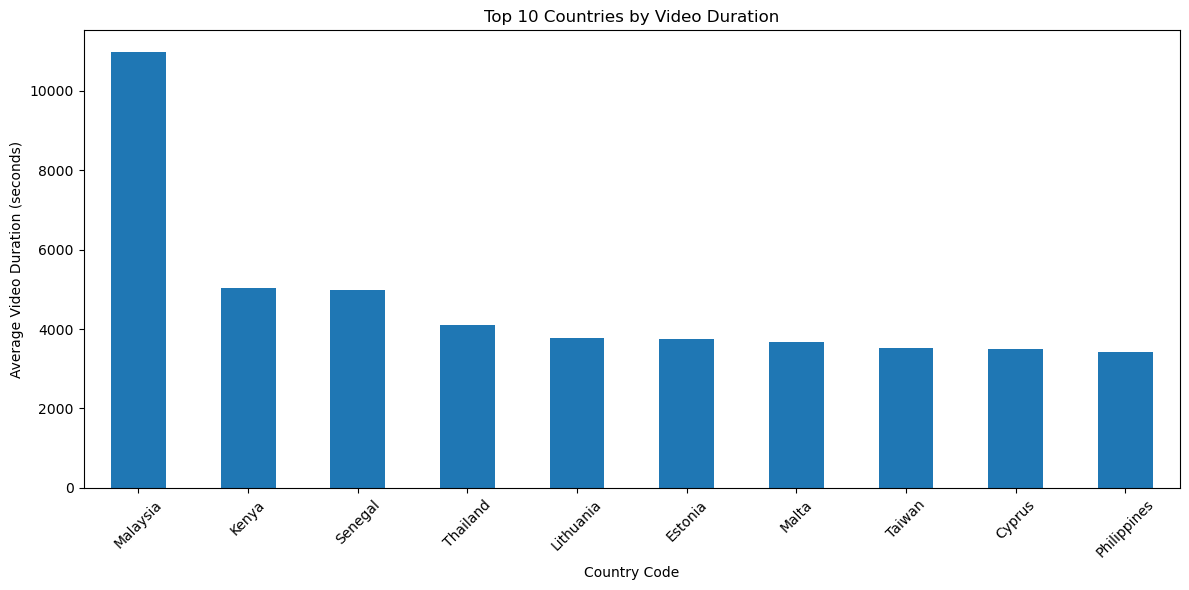

In [61]:
top_countries_engagement = country_analysis_debug.sort_values('engagement_rate', ascending=False).head(10)

top_countries_trend = country_analysis_debug.sort_values('avg_time_to_trend_days', ascending=True).head(10)

plt.figure(figsize=(12, 6))
top_countries_engagement['engagement_rate'].plot(kind='bar')
plt.title('Top 10 Countries by Engagement Rate')
plt.xlabel('Country Code')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
top_countries_trend['avg_time_to_trend_days'].plot(kind='bar')
plt.title('Top 10 Countries by Fastest Time to Trend')
plt.xlabel('Country Code')
plt.ylabel('Average Time to Trend (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
country_analysis_debug['video_duration_seconds'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries by Video Duration')
plt.xlabel('Country Code')
plt.ylabel('Average Video Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

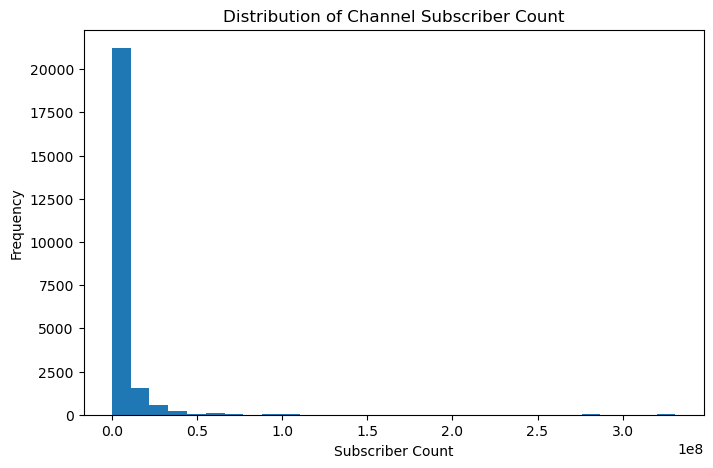

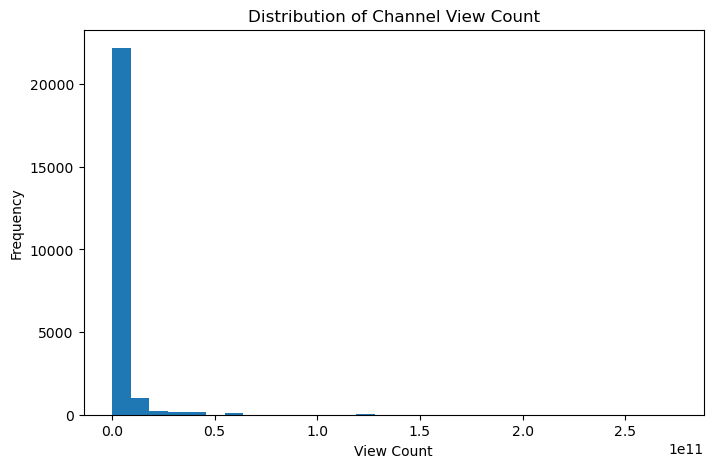

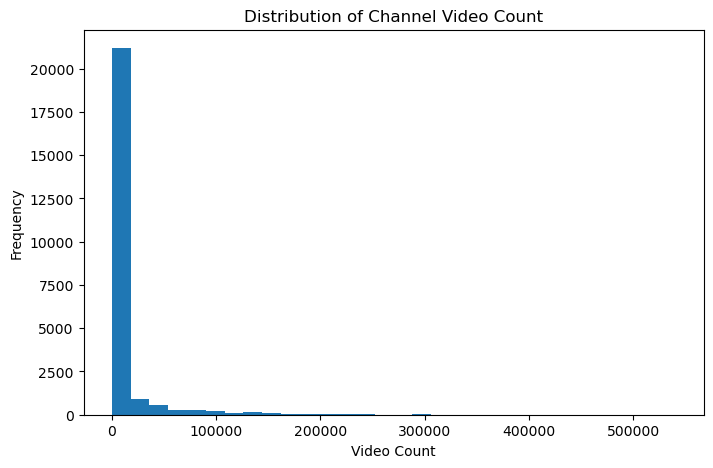

In [62]:
plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['channel_subscriber_count'].dropna(), bins=30)
plt.title('Distribution of Channel Subscriber Count')
plt.xlabel('Subscriber Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['channel_view_count'].dropna(), bins=30)
plt.title('Distribution of Channel View Count')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['channel_video_count'].dropna(), bins=30)
plt.title('Distribution of Channel Video Count')
plt.xlabel('Video Count')
plt.ylabel('Frequency')
plt.show()

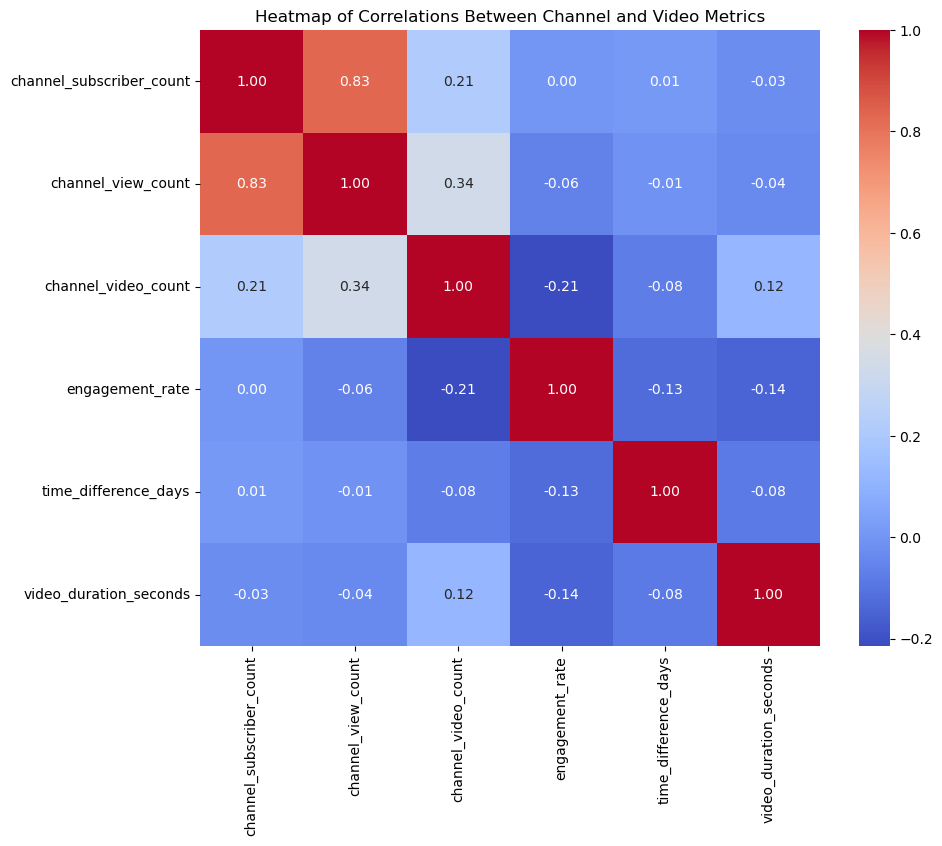

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = post_data_drop_id[
    ['channel_subscriber_count', 'channel_view_count', 'channel_video_count',
     'engagement_rate', 'time_difference_days', 'video_duration_seconds']
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlations Between Channel and Video Metrics')
plt.show()

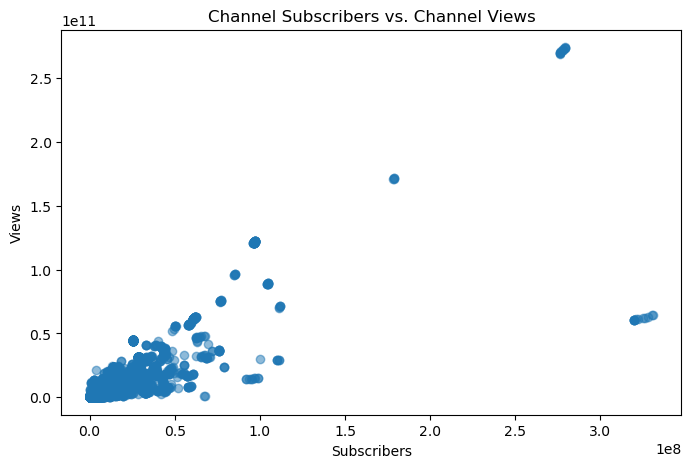

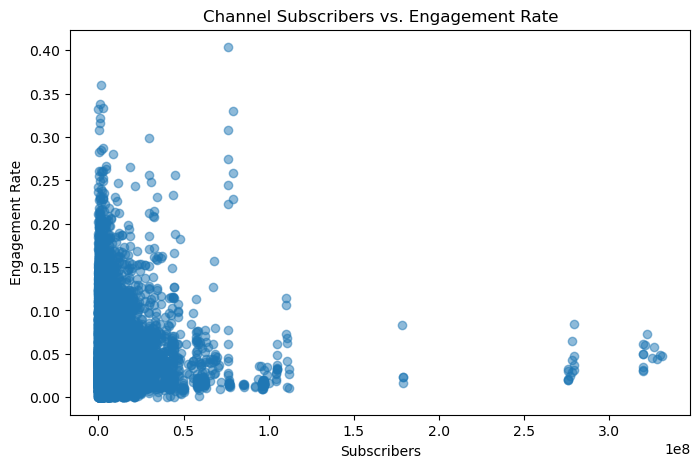

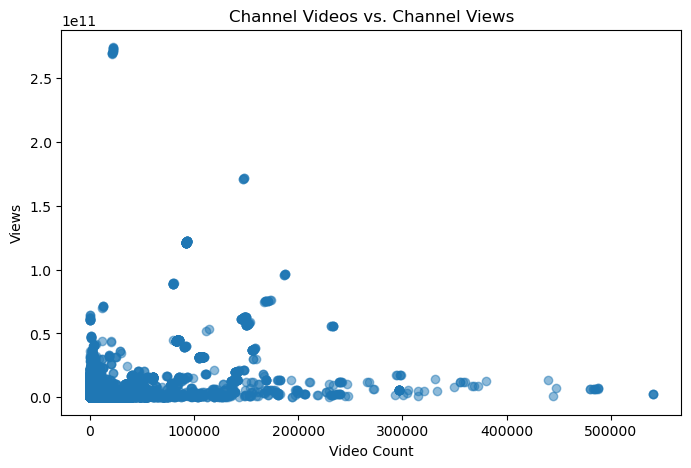

In [64]:
plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['channel_subscriber_count'], post_data_drop_id['channel_view_count'], alpha=0.5)
plt.title('Channel Subscribers vs. Channel Views')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['channel_subscriber_count'], post_data_drop_id['engagement_rate'], alpha=0.5)
plt.title('Channel Subscribers vs. Engagement Rate')
plt.xlabel('Subscribers')
plt.ylabel('Engagement Rate')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['channel_video_count'], post_data_drop_id['channel_view_count'], alpha=0.5)
plt.title('Channel Videos vs. Channel Views')
plt.xlabel('Video Count')
plt.ylabel('Views')
plt.show()

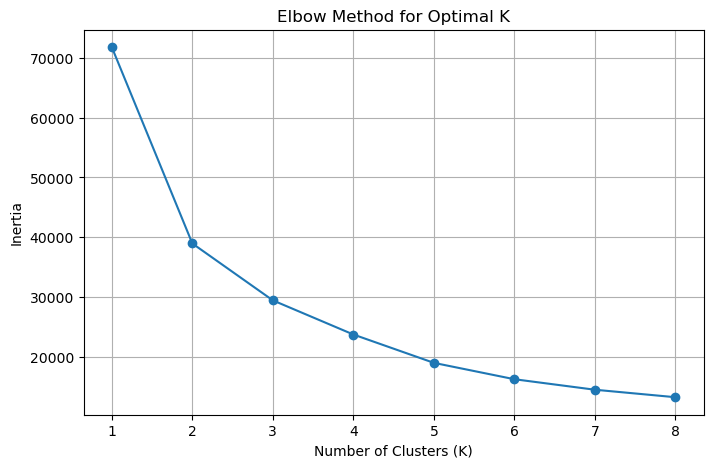

In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
clustering_features = post_data_drop_id[['channel_subscriber_count', 'channel_view_count', 'channel_video_count']].dropna()
clustering_features_log = np.log1p(clustering_features)
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features_log)
clustering_features_log = np.log1p(clustering_features)
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features_log)
inertia = []
K = range(1, 9)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [70]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_features_scaled)

post_data_drop_id['channel_cluster'] = cluster_labels

cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centroids_df = pd.DataFrame(
    np.expm1(cluster_centroids),
    columns=clustering_features.columns
)
cluster_centroids_df['Cluster'] = range(optimal_k)
cluster_centroids_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_36652\266082203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data_drop_id['channel_cluster'] = cluster_labels


,channel_subscriber_count,channel_view_count,channel_video_count,Cluster
0,7.112051e+05,3.538894e+08,8512.805036,0
1,1.807444e+06,5.815029e+08,485.106086,1
2,1.208531e+07,6.832792e+09,6333.083819,2
3,1.359169e+05,3.445318e+07,231.202812,3


In [75]:
cluster_centroids_df_fixed = cluster_centroids_df.sort_values('channel_subscriber_count', ascending=True).reset_index(drop=True)
labels = ['Low', 'Medium', 'High', 'Very High']
cluster_centroids_df_fixed['Cluster Category'] = labels
cluster_centroids_df_fixed.drop(columns=['Cluster'])
cluster_centroids_df_fixed

,channel_subscriber_count,channel_view_count,channel_video_count,Cluster,Cluster Category
0,1.359169e+05,3.445318e+07,231.202812,3,Low
1,7.112051e+05,3.538894e+08,8512.805036,0,Medium
2,1.807444e+06,5.815029e+08,485.106086,1,High
3,1.208531e+07,6.832792e+09,6333.083819,2,Very High


In [76]:
cluster_label_mapping = { # subscriber count
    3: 'Low',
    1: 'Medium',
    0: 'High',
    2: 'Very High'
}

post_data_drop_id['channel_cluster'] = post_data_drop_id['channel_cluster'].map(cluster_label_mapping)

post_data_drop_id[['channel_cluster', 'channel_subscriber_count', 'channel_view_count', 'channel_video_count']].head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_36652\1117806301.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data_drop_id['channel_cluster'] = post_data_drop_id['channel_cluster'].map(cluster_label_mapping)


,channel_cluster,channel_subscriber_count,channel_view_count,channel_video_count
0,Medium,11600000,464615150,43
1,High,1610000,399046746,4637
2,Medium,1380000,114331110,314
3,High,1610000,399046746,4637
4,Low,40600,19991522,56


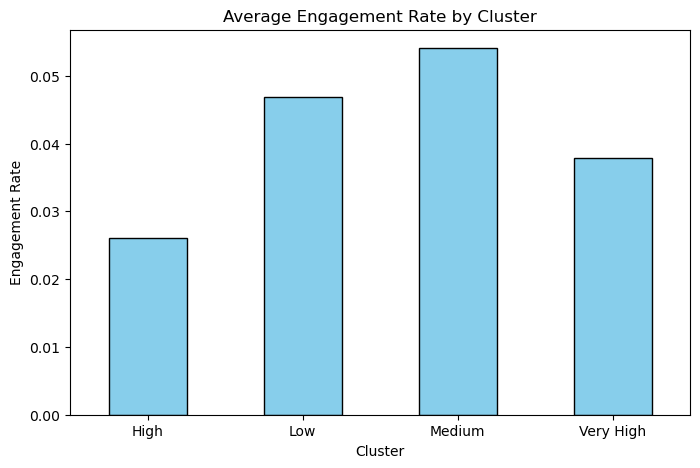

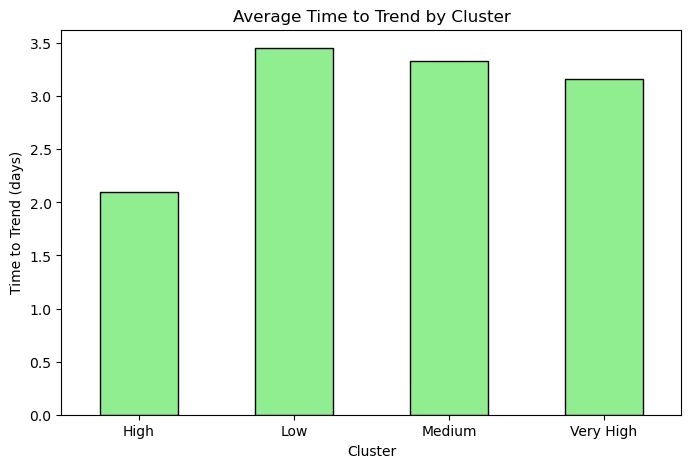

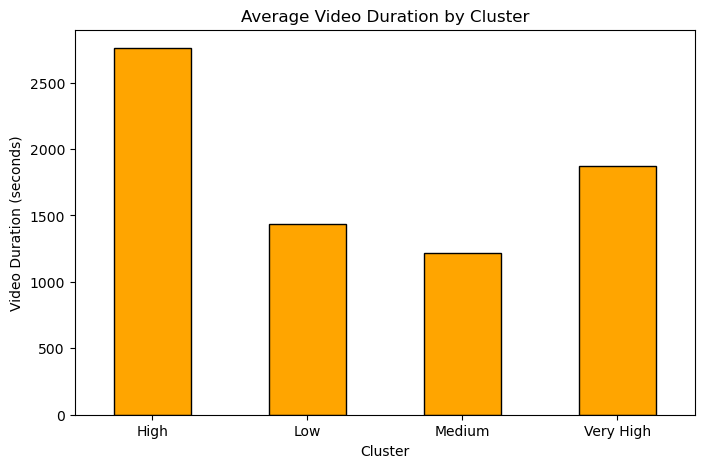

In [77]:
cluster_analysis = post_data_drop_id.groupby('channel_cluster').agg({
    'engagement_rate': 'mean',
    'time_difference_days': 'mean',
    'video_duration_seconds': 'mean',
    'channel_subscriber_count': 'mean',
    'channel_view_count': 'mean',
    'channel_video_count': 'mean'
}).rename(columns={
    'time_difference_days': 'Avg Time to Trend (days)',
    'video_duration_seconds': 'Avg Video Duration (seconds)',
    'channel_subscriber_count': 'Avg Subscribers',
    'channel_view_count': 'Avg Channel Views',
    'channel_video_count': 'Avg Channel Videos',
    'engagement_rate': 'Avg Engagement Rate'
})

plt.figure(figsize=(8, 5))
cluster_analysis['Avg Engagement Rate'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Engagement Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
cluster_analysis['Avg Time to Trend (days)'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Time to Trend by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Time to Trend (days)')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
cluster_analysis['Avg Video Duration (seconds)'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Video Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Video Duration (seconds)')
plt.xticks(rotation=0)
plt.show()

In [79]:
post_data_drop_id.columns

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description',
       'engagement_rate', 'time_difference', 'video_duration_seconds',
       'time_difference_days', 'channel_cluster'],
      dtype='object')

In [98]:
data = post_data_drop_id.copy()

In [102]:
data['time_to_trend_difference_seconds'] = data['time_difference'].dt.total_seconds()
data['is_weekend'] = pd.to_datetime(data['video_published_at']).dt.weekday >= 5

In [112]:
data['is_trending'] = data['time_difference'].apply(lambda x: 1 if x <= pd.Timedelta(days=1) else 0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

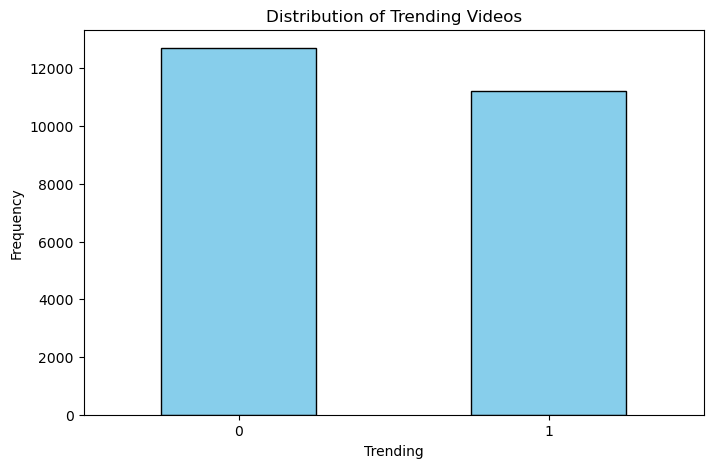

In [113]:
# plot the distribution of the target variable
plt.figure(figsize=(8, 5))
data['is_trending'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Trending Videos')
plt.xlabel('Trending')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

In [114]:
data['published_hour'] = data['video_published_at'].dt.hour
data['published_morning'] = data['published_hour'].between(6, 12)
data['published_afternoon'] = data['published_hour'].between(12, 18)
data['published_evening'] = data['published_hour'].between(18, 24)
data['published_night'] = data['published_hour'].between(0, 6)

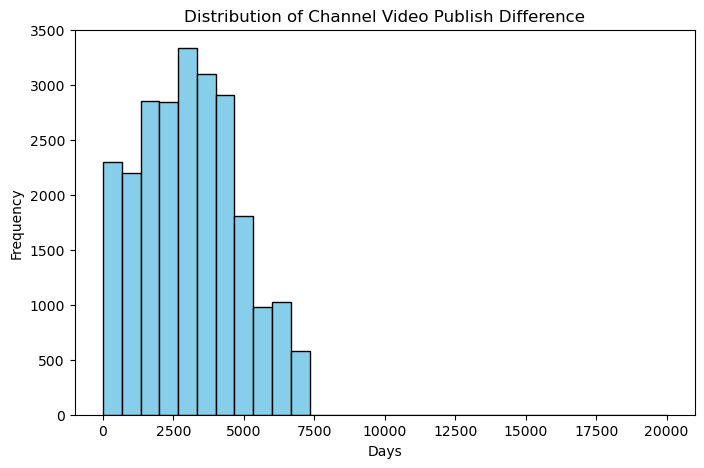

In [117]:
data['channel_video_channel_publish_difference'] = (data['video_published_at'] - data['channel_published_at']).dt.days
# plot 
plt.figure(figsize=(8, 5))
data['channel_video_channel_publish_difference'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Channel Video Publish Difference')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

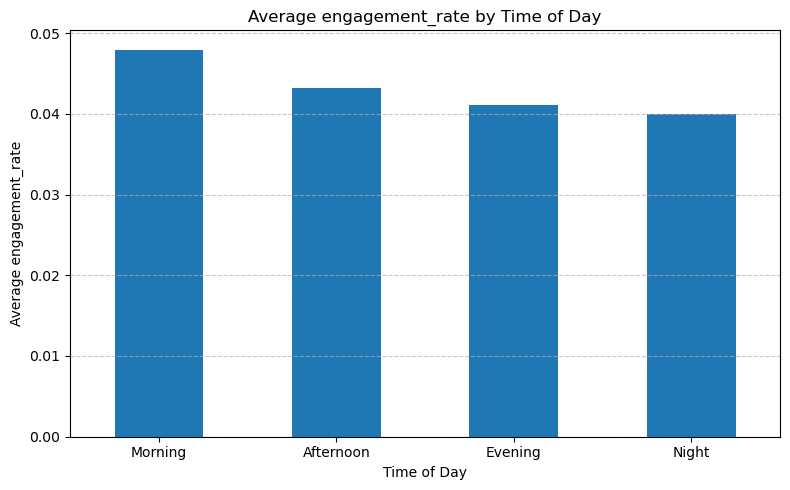

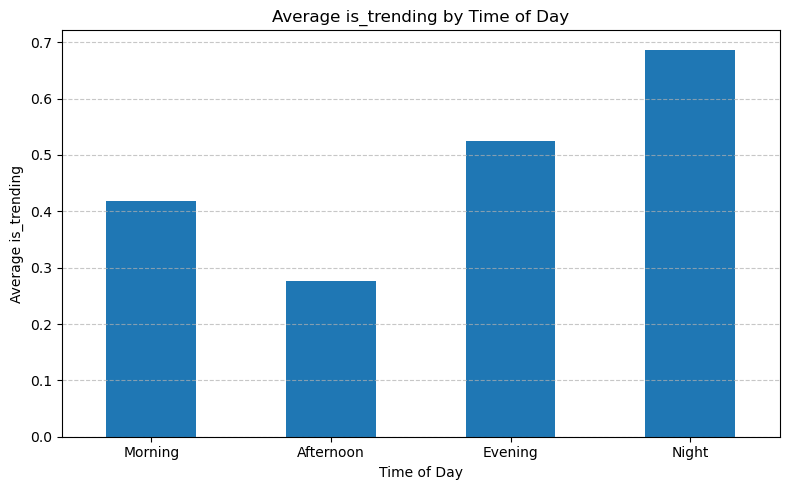

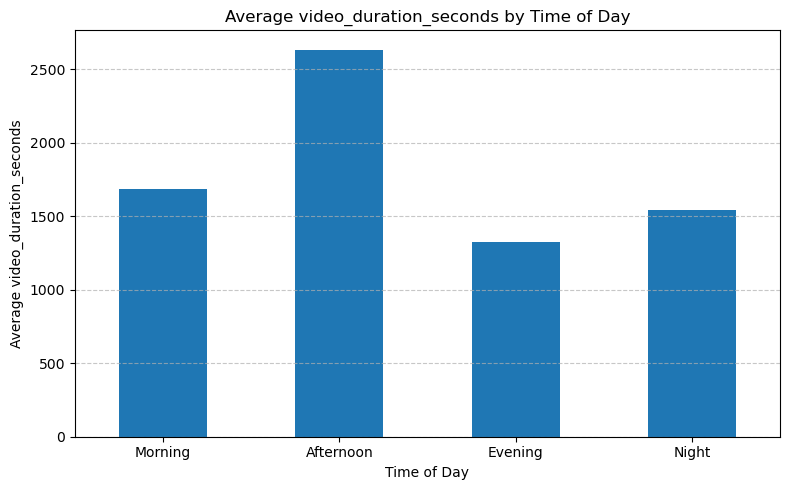

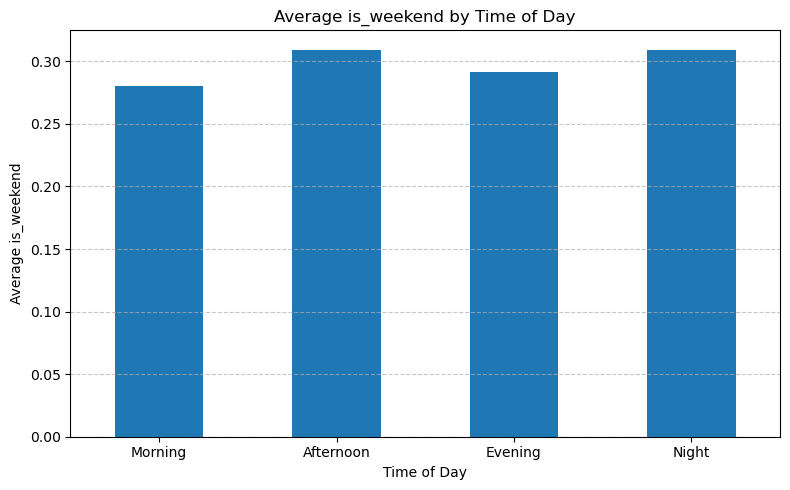

In [118]:
time_of_day_columns = ['published_morning', 'published_afternoon', 'published_evening', 'published_night']

data['time_of_day'] = data[time_of_day_columns].idxmax(axis=1)

metrics = ['engagement_rate', 'is_trending', 'video_duration_seconds', 'is_weekend']
time_of_day_analysis = data.groupby('time_of_day')[metrics].mean()

for metric in metrics:
    plt.figure(figsize=(8, 5))
    time_of_day_analysis[metric].plot(kind='bar', rot=0)
    plt.title(f'Average {metric} by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel(f'Average {metric}')
    plt.xticks([0, 1, 2, 3], ['Morning', 'Afternoon', 'Evening', 'Night'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<Figure size 2160x1440 with 0 Axes>

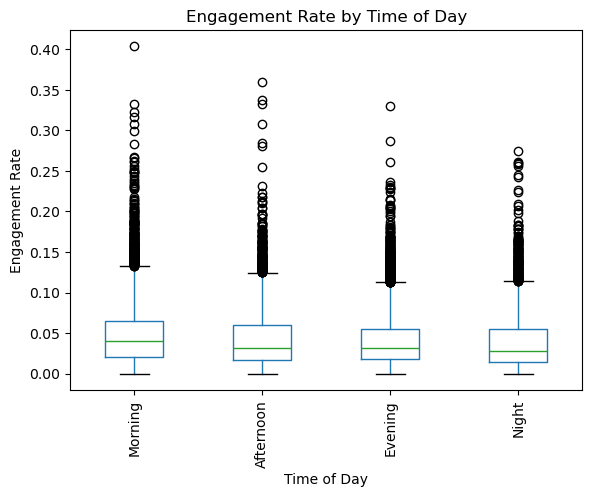

In [120]:
plt.figure(figsize=(18, 12), dpi=120)
data.boxplot(column='engagement_rate', by='time_of_day', grid=False)
plt.title('Engagement Rate by Time of Day')
plt.suptitle('')
plt.xlabel('Time of Day')
plt.ylabel('Engagement Rate')
# rotato to 90 degrees x axis
plt.xticks([1, 2, 3, 4], ['Morning', 'Afternoon', 'Evening', 'Night'], rotation=90)
plt.show()

In [122]:
data.reset_index(drop=True, inplace=True)
data

,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,time_to_trend_difference_seconds,is_weekend,is_trending,published_hour,published_morning,published_afternoon,published_evening,published_night,channel_video_channel_publish_difference,time_of_day
0,bB3-CUMERIU,2024-10-11 00:00:06+00:00,2024-10-12,United Arab Emirates,UCNYi_zGmR519r5gYdOKLTjQ,JENNIE - Mantra (Official Music Video),Official music video for “Mantra” by JENNIE ou...,https://i.ytimg.com/vi/bB3-CUMERIU/default.jpg,Music,"JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...",...,86394.0,False,1,0,False,False,False,True,1366,published_night
1,5ObJt_71AYc,2024-10-11 02:59:21+00:00,2024-10-12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,CHILE vs. BRASIL [1-2] | RESUMEN | ELIMINATORI...,#Chile #Brasil #eliminatoriassudamericanas #Cr...,https://i.ytimg.com/vi/5ObJt_71AYc/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,75639.0,False,1,2,False,False,False,True,3886,published_night
2,zfb0whgBBA8,2024-10-11 11:07:25+00:00,2024-10-12,United Arab Emirates,UCgGYPnVJytkr6sVNLQ-l0zQ,تحدي الحقيبة مع ابو عبير 🔥 | سلسلتنا #2,"1,375,547 مشترك❤️\n\nـــــــــــــــــــــــــ...",https://i.ytimg.com/vi/zfb0whgBBA8/default.jpg,Gaming,"تشكيله,فيفا,فيفا20,التمت,درافت,زلاتان,ام,جي,مل...",...,46355.0,False,1,11,True,False,False,False,4453,published_morning
3,SJfoPdeOPCQ,2024-10-11 00:10:10+00:00,2024-10-12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,VENEZUELA vs. ARGENTINA [1-1] | RESUMEN | ELIM...,#Venezuela #Argentina #eliminatoriassudamerica...,https://i.ytimg.com/vi/SJfoPdeOPCQ/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,85790.0,False,1,0,False,False,False,True,3886,published_night
4,UVb6QOKy0bI,2024-10-09 12:30:27+00:00,2024-10-12,United Arab Emirates,UCOzubmwpVZI7gD0Jf7Bk3Aw,Bougainvillea Trailer | October 17 | Jyothirma...,Presenting The Official Trailer of Bougainvill...,https://i.ytimg.com/vi/UVb6QOKy0bI/default.jpg,Film & Animation,None,...,214173.0,False,0,12,True,True,False,False,2687,published_morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23928,SyUAZ7XmYFU,2024-11-25 11:00:32+00:00,2024-11-26,Taiwan,UC2M61YK4ntt9iK-23XhDwcw,【家正婦/夫報到！】隊長是最強奶爸！陳傑憲慶功宴帶娃 球迷讚爆｜12強｜慶功宴｜育兒,隊長根本是國民奶爸了吧😍\n各位家正婦/夫們，現在知道對手是誰了嗎(威~\n\n【隊長是最強...,https://i.ytimg.com/vi/SyUAZ7XmYFU/default.jpg,People & Blogs,"udn video,udn tv,聯合報,聯合新聞網,社群熱搜",...,46768.0,False,1,11,True,False,False,False,4609,published_morning
23929,6CYKZaUdZjo,2024-11-24 13:47:17+00:00,2024-11-26,Taiwan,UC4LjkybVKXCDlneVXlKAbmw,史上最強台灣隊驚奇奪冠 4：0完封大魔王日本隊創紀錄｜#shorts #鏡新聞,#台灣隊冠軍#12強#TEAM TAIWAN\n\n（鏡新聞已上架86台，若無法收看，請洽詢...,https://i.ytimg.com/vi/6CYKZaUdZjo/default.jpg,Sports,"鏡電視,鏡新聞,mnews,新聞,news,新聞直播,政治,國際,財經,社會,生活,娛樂,氣...",...,123163.0,True,0,13,False,True,False,False,2546,published_afternoon
23930,mqOtVrPZGoU,2024-11-25 12:00:06+00:00,2024-11-26,Taiwan,UCVF3bTd3dxM4IfOMFCbNADA,【1125】卡提諾狂新聞 #442 我們是冠軍！🏆🏆🇹🇼🏅🏅台灣南波萬！,【1125】卡提諾狂新聞 #442 我們是冠軍！🏆🏆🇹🇼🏅🏅台灣南波萬！\n請繼續支持狂新聞...,https://i.ytimg.com/vi/mqOtVrPZGoU/default.jpg,News & Politics,"狂新聞,卡提諾,9487,948794狂,母蝦大公蝦小,移動神主牌,三寶,行車紀錄器,政客,...",...,43194.0,False,1,12,True,True,False,False,3785,published_morning
23931,Y3OIyFUEdtc,2024-11-25 13:36:09+00:00,2024-11-26,Cyprus,UCS1nKAcuFiw4BQVrp93JdAA,5 × 5 CHRISTMAS CHALLENGE στο FLYING TIGER C...,ΠΑΜΕ για τους 1.000.000. εγγραφές ! ΓΙΝΕ ΣΥΝΔ...,https://i.ytimg.com/vi/Y3OIyFUEdtc/default.jpg,People & Blogs,5 × 5 CHRISTMAS CHALLENGE στο FLYING TIGER COP...,...,37431.0,False,1,13,False,True,False,False,2875,published_afternoon


In [123]:
data.to_csv('data_youtube_cleaned_final.csv', index=False)